In [1]:

def gen(num_examples,datax, datay):
    with open('../dataset/data', 'w') as file:
        for _ in range(num_examples): 

            x = datax[_].tolist()
            y = datay[_].tolist()

            for e in x: print(e, end=' ',file=file)
            print(y[0],file=file)

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import pandas as pd

num_examples = 200
import math
import numpy as np

In [3]:
# # 生成训练数据
# x_train = torch.unsqueeze(torch.linspace(-100, 100, num_examples), dim=1)  # 在-1到1之间生成100个点
x_train = torch.unsqueeze(torch.linspace(-2*np.pi, 2*np.pi, 200), dim=1)  # 在-1到1之间生成100个点
# y_train = 2*x_train.pow(2) - x_train + 2 +0.2 * torch.randn(x_train.size())  # y=x^2 加上一些噪声
# y_train = 100*(-2*x_train.pow(5) +5*x_train.pow(4) + 4*x_train.pow(3) - 3*x_train.pow(2) - 4*x_train + 1) +0.2 * torch.randn(x_train.size())  # y=x^2 加上一些噪声
y_train = 10*(torch.sin(x_train) + torch.cos(x_train)) + 2 * torch.randn(x_train.size())  # y=x^2 加上一些噪声

# x_train = x_train * 1000000
gen(num_examples, x_train, y_train)

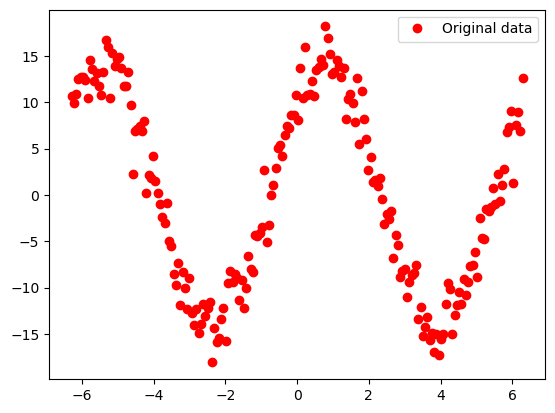

In [4]:
# 绘制拟合结果
# predicted = model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
# plt.plot(x_train.numpy(), predicted, 'b-', label='Pytorch MLP Version line')

# dc = pd.read_csv('../dataset/data.csv',header=None, names=['x','y'], dtype=float,sep=' ')
# plt.plot(dc['x'], dc['y'], 'g-', label='Bird MLP Version line', linewidth=2)

plt.legend()
plt.show()


# dc

In [5]:
# x_train[0].tolist()

In [6]:
layerNum = 32

class PolynomialModel(nn.Module):
    def __init__(self):
        super(PolynomialModel, self).__init__()
        self.fc1 = nn.Linear(1, layerNum )  # 一个输入特征，10个隐藏层神经元
        self.fc2 = nn.Linear(layerNum ,layerNum )  # 10个隐藏层神经元，一个输出
        self.fc3 = nn.Linear(layerNum , 1)  # 10个隐藏层神经元，一个输出
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x

In [7]:


# 实例化模型
model = PolynomialModel()

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001)


In [8]:
# 训练模型
num_epochs = 200000
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)

    # Backward pass and optimization
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # 打印训练信息
    if (epoch+1) % 1000 == 0:
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, loss.item()))



Epoch [1000/200000], Loss: 93.7587
Epoch [2000/200000], Loss: 87.1668
Epoch [3000/200000], Loss: 69.4573
Epoch [4000/200000], Loss: 41.4898
Epoch [5000/200000], Loss: 27.4391
Epoch [6000/200000], Loss: 23.0041
Epoch [7000/200000], Loss: 19.3891
Epoch [8000/200000], Loss: 15.9402
Epoch [9000/200000], Loss: 12.8777
Epoch [10000/200000], Loss: 10.5413
Epoch [11000/200000], Loss: 9.0548
Epoch [12000/200000], Loss: 8.2473
Epoch [13000/200000], Loss: 7.8230
Epoch [14000/200000], Loss: 7.6132
Epoch [15000/200000], Loss: 7.4998
Epoch [16000/200000], Loss: 7.4374
Epoch [17000/200000], Loss: 7.4036
Epoch [18000/200000], Loss: 7.3804
Epoch [19000/200000], Loss: 7.3641
Epoch [20000/200000], Loss: 7.3532
Epoch [21000/200000], Loss: 7.3314
Epoch [22000/200000], Loss: 7.3208
Epoch [23000/200000], Loss: 7.3142
Epoch [24000/200000], Loss: 7.3096
Epoch [25000/200000], Loss: 7.3059
Epoch [26000/200000], Loss: 7.3033
Epoch [27000/200000], Loss: 7.3012
Epoch [28000/200000], Loss: 7.2993
Epoch [29000/200000

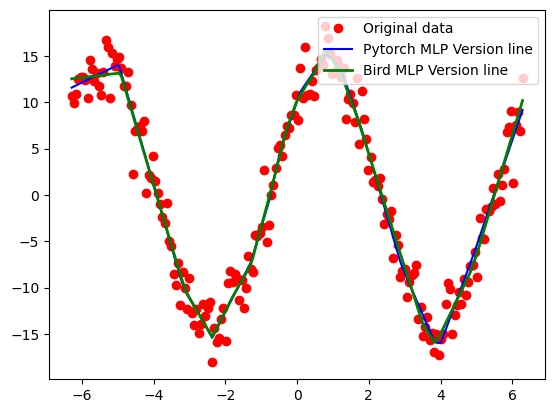

,x,y
0,-6.28319,12.51950
1,-6.22004,12.54860
2,-6.15689,12.57770
3,-6.09374,12.60670
4,-6.03060,12.63580
...,...,...
195,6.03060,6.88173
196,6.09374,7.70392
197,6.15689,8.52612
198,6.22004,9.34831


In [15]:
# 绘制拟合结果
predicted = model(x_train).detach().numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predicted, 'b-', label='Pytorch MLP Version line')

dc = pd.read_csv('../dataset/data.csv',header=None, names=['x','y'], dtype=float,sep=' ')
plt.plot(dc['x'], dc['y'], 'g-', label='Bird MLP Version line', linewidth=2)

plt.legend()
plt.show()


dc

In [10]:
def mse(y, yhat):
    return (y-yhat)**2 *0.5

s = 0
for i in range(100):
    s += float( mse(dc['y'][i], predicted[i]) )
    # print(mse(y_train.numpy()[i], predicted[i]))

s

4974.365650460124

In [11]:
s = 0
for i in range(100):
    s += float( mse(y_train.numpy()[i], dc['y'][i]) )
    # print(mse(y_train.numpy()[i], predicted[i]))

s

5175.542266707096